In [68]:


import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/movie-dialog-corpus/movie_characters_metadata.tsv
/kaggle/input/movie-dialog-corpus/raw_script_urls.tsv
/kaggle/input/movie-dialog-corpus/movie_titles_metadata.tsv
/kaggle/input/movie-dialog-corpus/movie_lines.tsv
/kaggle/input/movie-dialog-corpus/README.txt
/kaggle/input/movie-dialog-corpus/movie_conversations.tsv


In [69]:
conversations = pd.read_csv(
    "/kaggle/input/movie-dialog-corpus/movie_conversations.tsv", 
    sep='\t', 
    encoding='ISO-8859-2',
    names = ['charID_1', 'charID_2', 'movieID', 'conversation']
)


lines = pd.read_csv(
    "/kaggle/input/movie-dialog-corpus/movie_lines.tsv", 
    encoding='utf-8-sig', 
    sep='\t', 
    on_bad_lines="skip", 
    header = None,
    names = ['lineID', 'charID', 'movieID', 'charName', 'text'],
    index_col=['lineID']
)

characters = pd.read_csv(
    "/kaggle/input/movie-dialog-corpus/movie_characters_metadata.tsv", 
    sep='\t', 
    header = None,
    on_bad_lines= "skip",
    names = ['charID','charName','movieID','movieName','gender','score'],
    index_col=['charID']
)

titles = pd.read_csv(
    "/kaggle/input/movie-dialog-corpus/movie_titles_metadata.tsv",
    sep='\t',
    header=None,
    on_bad_lines="skip",
    names=['movieID', 'title', 'year', 'ratingIMDB', 'votes', 'genresIMDB'],
    index_col=['movieID']
)


In [70]:
conversations

,charID_1,charID_2,movieID,conversation
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']
...,...,...,...,...
83092,u9028,u9031,m616,['L666324' 'L666325' 'L666326' 'L666327']
83093,u9028,u9031,m616,['L666575' 'L666576']
83094,u9030,u9034,m616,['L666256' 'L666257']
83095,u9030,u9034,m616,['L666369' 'L666370' 'L666371' 'L666372']


In [71]:
lines

,charID,movieID,charName,text
lineID,,,,
L1045,u0,m0,BIANCA,They do not!
L1044,u2,m0,CAMERON,They do to!
L985,u0,m0,BIANCA,I hope so.
L984,u2,m0,CAMERON,She okay?
L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...
L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
L666369,u9030,m616,DURNFORD,Your orders Mr Vereker?


In [72]:
titles

,title,year,ratingIMDB,votes,genresIMDB
movieID,,,,,
m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']
...,...,...,...,...,...
m612,watchmen,2009,7.8,135229.0,['action' 'crime' 'fantasy' 'mystery' 'sci-fi'...
m613,xxx,2002,5.6,53505.0,['action' 'adventure' 'crime']
m614,x-men,2000,7.4,122149.0,['action' 'sci-fi']


In [73]:
characters

,charName,movieID,movieName,gender,score
charID,,,,,
u0,BIANCA,m0,10 things i hate about you,f,4
u1,BRUCE,m0,10 things i hate about you,?,?
u2,CAMERON,m0,10 things i hate about you,m,3
u3,CHASTITY,m0,10 things i hate about you,?,?
u4,JOEY,m0,10 things i hate about you,m,6
...,...,...,...,...,...
u9030,DURNFORD,m616,zulu dawn,?,?
u9031,MELVILL,m616,zulu dawn,?,?
u9032,NORRIS-NEWMAN,m616,zulu dawn,?,?


In [74]:
import re
import matplotlib.pyplot as plt # drawing and visualizing data
import seaborn as sns # nicer plotting above matplotlib
import nltk # NLP library
from nltk.tokenize import word_tokenize
from tqdm.autonotebook import tqdm

In [75]:

conversations['conversation'] = conversations['conversation'].map(lambda x: re.findall(r"\w+", x))

# I could not find another way to filter based on the length of the conversation other than creating another column
conversations['length'] = conversations['conversation'].apply(lambda x: len(x))

conversations.sort_values(by=['length'], ascending=False)

,charID_1,charID_2,movieID,conversation,length
42477,u4522,u4525,m299,"[L135360, L135361, L135362, L135363, L135364, ...",89
73134,u7932,u7936,m537,"[L553902, L553903, L553904, L553905, L553906, ...",59
70355,u7663,u7666,m518,"[L513247, L513248, L513249, L513250, L513251, ...",56
45571,u4857,u4866,m324,"[L167261, L167262, L167263, L167264, L167265, ...",55
11348,u1240,u1243,m82,"[L267558, L267559, L267560, L267561, L267562, ...",54
...,...,...,...,...,...
20661,u2256,u2265,m145,"[L412100, L412101]",2
55457,u6020,u6022,m400,"[L308227, L308228]",2
11491,u1244,u1248,m82,"[L268306, L268307]",2
55459,u6021,u6024,m400,"[L308517, L308518]",2


count    83097.000000
mean         3.666955
std          2.891798
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         89.000000
Name: length, dtype: float64


<Axes: xlabel='length'>

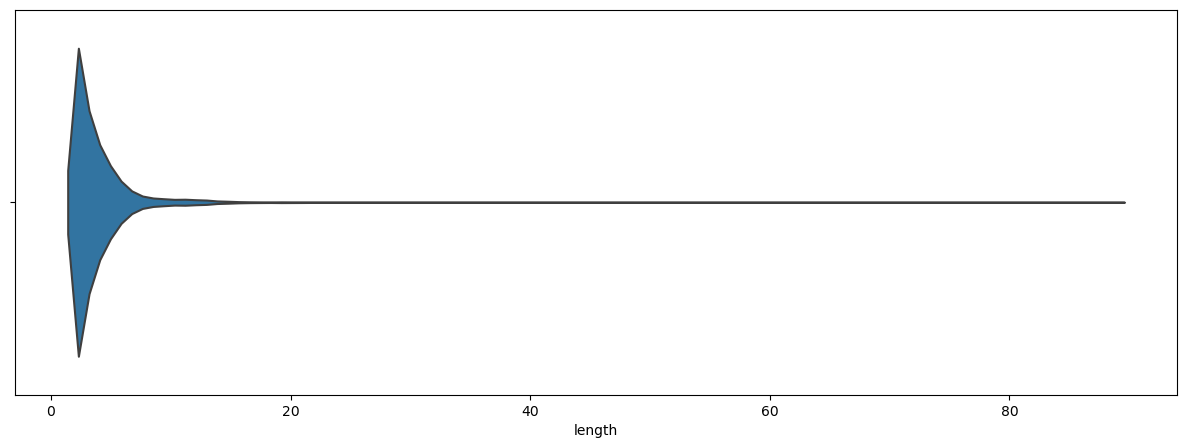

In [76]:
print(conversations.length.describe())
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(ax=ax, x=conversations.length, inner=None)

In [77]:
def view_convo(conversation, characters, movies, lines):
    charID_1, charID_2, movieID = conversation['charID_1'], conversation['charID_2'], conversation['movieID']
    
    char1 = characters.loc[charID_1].charName
    char2 = characters.loc[charID_2].charName
    movie = movies.loc[movieID].title
    
    convo_header = f"This conversation was between {char1} and {char2}, from movie : {movie}."
    print(convo_header)
    print(f"{'-' * len(convo_header)}")

    for lineID in conversation.conversation:
        line = lines.loc[lineID]
        print(f"{line.charName} : {line.text}")

In [78]:
view_convo(conversations.iloc[0], characters, titles, lines)

This conversation was between BIANCA and CAMERON, from movie : 10 things i hate about you.
------------------------------------------------------------------------------------------
BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
CAMERON : Well I thought we'd start with pronunciation if that's okay with you.
BIANCA : Not the hacking and gagging and spitting part.  Please.
CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


In [79]:
def view_all_convos(char_name1, char_name2, movie_title, characters, movies, lines, conversations):
    # Identify the character IDs and movie ID
    charID_1 = characters[characters['charName'] == char_name1].index[0]
    charID_2 = characters[characters['charName'] == char_name2].index[0]
    movieID = movies[movies['title'] == movie_title].index[0]


    relevant_convos = conversations[((conversations['charID_1'] == charID_1) & (conversations['charID_2'] == charID_2) |
                                     (conversations['charID_1'] == charID_2) & (conversations['charID_2'] == charID_1)) &
                                    (conversations['movieID'] == movieID)]

    # Loop through the relevant conversations
    for i, conversation in relevant_convos.iterrows():
        convo_header = f"This conversation was between {char_name1} and {char_name2}, from movie : {movie_title}."
        print(convo_header)
        print(f"{'-' * len(convo_header)}")

        for lineID in conversation.conversation:
            line = lines.loc[lineID]
            print(f"{line.charName} : {line.text}")

        print("\n\n")  # New line between different conversations


In [80]:
def check_columns_existence(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"The column '{col}' does not exist in DataFrame")

# Check if columns exist in each DataFrame
check_columns_existence(characters, ['charName'])
check_columns_existence(titles, ['title'])
check_columns_existence(lines, ['charName', 'text'])
check_columns_existence(conversations, ['charID_1', 'charID_2', 'movieID', 'conversation'])


In [81]:
def get_movie_list(movies):
    movie_list = movies['title'].tolist()
    return movie_list


In [82]:
movie_list = get_movie_list(titles)
print(movie_list[:5])


['10 things i hate about you', '1492: conquest of paradise', '15 minutes', '2001: a space odyssey', '48 hrs.']


In [86]:
def extract_conversations_for_movies(movies_list, characters, movies, lines, conversations):
    movie_ids = [movies[movies['title'] == movie_title].index[0] for movie_title in movies_list]
    movie_conversations = {}

    for movie_id in movie_ids:
        # Get all conversations for this movie
        relevant_convos = conversations[conversations['movieID'] == movie_id]
        
        # If the movie title isn't already in the dictionary, add it with an empty list
        movie_title = movies.loc[movie_id].title
        if movie_title not in movie_conversations:
            movie_conversations[movie_title] = []
        
        # Loop through the relevant conversations
        for i, conversation in relevant_convos.iterrows():
            char_name1 = characters.loc[conversation['charID_1']].charName
            char_name2 = characters.loc[conversation['charID_2']].charName
            
            convo_text = []  # Create an empty list to store the lines of this conversation

            for lineID in conversation.conversation:
                try:
                    line = lines.loc[lineID]
                    convo_text.append(f"{line.charName} : {line.text}")  # Add each line to the convo_text list
                except KeyError:
                    continue

            # Join the conversation lines together into a single string and add to the movie's list
            movie_conversations[movie_title].append(' '.join(convo_text))

    return movie_conversations


In [87]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)


In [89]:
data['10 things i hate about you'][:10]

["BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again. CAMERON : Well I thought we'd start with pronunciation if that's okay with you. BIANCA : Not the hacking and gagging and spitting part.  Please. CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?",
 "BIANCA : You're asking me out.  That's so cute. What's your name again? CAMERON : Forget it.",
 "BIANCA : No no it's my fault -- we didn't have a proper introduction --- CAMERON : Cameron. BIANCA : The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does. CAMERON : Seems like she could get a date easy enough...",
 "CAMERON : Why? BIANCA : Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something. CAMERON : That's a shame.",
 'BIANCA : Gosh if only we could find Kat a boyfriend

In [90]:
import re

def prepare_data_for_ner(data):
    TRAIN_DATA = []
    for movie, convos in data.items():
        for convo in convos:
            entities = []
            # Using regex to find capitalized words or consecutive capitalized words, which should mostly be character names
            for m in re.finditer(r'(\b[A-Z][a-z]*\b)(\s\b[A-Z][a-z]*\b)*', convo):
                entities.append((m.start(), m.end(), 'CHARACTER'))
            TRAIN_DATA.append((convo, {"entities": entities}))
    return TRAIN_DATA



In [91]:
prepared_data = prepare_data_for_ner(data)

In [92]:
prepared_data[:10]

[("BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again. CAMERON : Well I thought we'd start with pronunciation if that's okay with you. BIANCA : Not the hacking and gagging and spitting part.  Please. CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?",
  {'entities': [(9, 12, 'CHARACTER'),
    (34, 49, 'CHARACTER'),
    (54, 68, 'CHARACTER'),
    (136, 141, 'CHARACTER'),
    (153, 159, 'CHARACTER'),
    (232, 235, 'CHARACTER'),
    (280, 286, 'CHARACTER'),
    (298, 302, 'CHARACTER'),
    (337, 343, 'CHARACTER'),
    (354, 362, 'CHARACTER'),
    (365, 370, 'CHARACTER')]}),
 ("BIANCA : You're asking me out.  That's so cute. What's your name again? CAMERON : Forget it.",
  {'entities': [(9, 12, 'CHARACTER'),
    (32, 36, 'CHARACTER'),
    (48, 52, 'CHARACTER'),
    (82, 88, 'CHARACTER')]}),
 ("BIANCA : No no it's my fault -- we didn't have a proper introduction --- 

In [93]:
import spacy
from spacy import displacy

# Load a model for English language
nlp = spacy.load("en_core_web_sm")

def process_conversations(conversations):
    conversations_entities = []
    for conversation in conversations:
        # apply NER on the conversation
        doc = nlp(conversation)
        entities = []
        for ent in doc.ents:
            # store the entity, its category and the position in the text
            entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))
        conversations_entities.append(entities)
    return conversations_entities

conversations = data['10 things i hate about you']

conversations_entities = process_conversations(conversations)

for i, entities in enumerate(conversations_entities):
    print(f"Entities in conversation {i + 1}:")
    for entity in entities:
        print(entity)

Entities in conversation 1:
('BIANCA', 0, 6, 'ORG')
('Roxanne Korrine', 34, 49, 'PERSON')
('Andrew Barrett', 54, 68, 'PERSON')
('BIANCA', 223, 229, 'ORG')
('French', 337, 343, 'NORP')
('Saturday', 354, 362, 'DATE')
Entities in conversation 2:
('BIANCA', 0, 6, 'ORG')
Entities in conversation 3:
('BIANCA', 0, 6, 'ORG')
('Cameron', 83, 90, 'PERSON')
('BIANCA', 92, 98, 'ORG')
('Cameron', 114, 121, 'PERSON')
Entities in conversation 4:
('BIANCA', 15, 21, 'ORG')
Entities in conversation 5:
('BIANCA', 0, 6, 'ORG')
Entities in conversation 6:
('BIANCA', 0, 6, 'ORG')
('BIANCA', 91, 97, 'ORG')
('BIANCA', 366, 372, 'ORG')
('French', 382, 388, 'NORP')
Entities in conversation 7:
('BIANCA', 0, 6, 'ORG')
('Find the Wench A Date', 27, 48, 'WORK_OF_ART')
Entities in conversation 8:
('BIANCA', 17, 23, 'ORG')
Entities in conversation 9:
('BIANCA', 42, 48, 'ORG')
Entities in conversation 10:
('BIANCA', 44, 50, 'ORG')
Entities in conversation 11:
('BIANCA', 54, 60, 'ORG')
('Eber', 63, 67, 'PERSON')
('Deep